10가지 사물의 이미지가 있는 CIFAR-10 데이터를 학습하고 그 종류를 판단하는 모델을 모두 연결된 다 층 구조를 사용하여 만들어 봅시다. 학습데이터로 과적합을 방지하는 Dropout 에 대해 공부해봅시다.

train_images <class 'numpy.ndarray'> (50000, 32, 32, 3) uint8
train_labels <class 'numpy.ndarray'> (50000, 1) uint8
test_images <class 'numpy.ndarray'> (10000, 32, 32, 3) uint8
test_labels <class 'numpy.ndarray'> (10000, 1) uint8


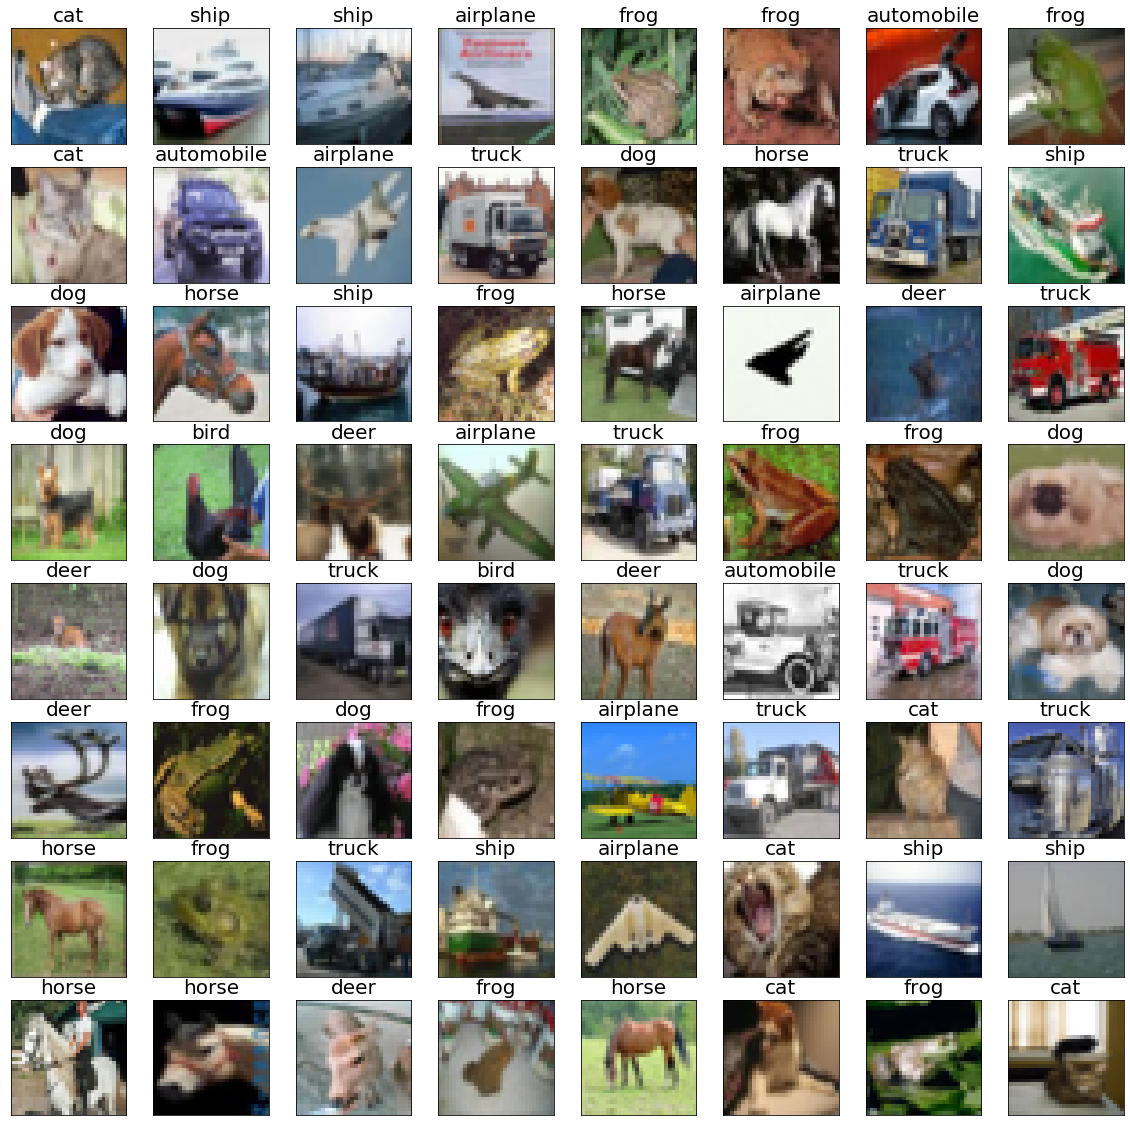

In [1]:
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck' ]

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]], {'fontsize':20} )
    plt.imshow( test_images[i] )

다음과 같이 입력 데이터의 전처리를 해줍니다. 2차원 이미지를 1차원 데이터로 만들어 주고 최대값으로 나누어 정규화를 하고 double precision 까지는 필요가 없으므로 float32 자료형으로 변환합니다.

In [2]:
_, H, W, C = train_images.shape
train_x = ( train_images.reshape(-1, H*W*C) / 255 ).astype('float32')
test_x = ( test_images.reshape(-1, H*W*C) / 255 ).astype('float32')
print( 'test_x', type(test_x), test_x.shape, test_x.dtype )

test_x <class 'numpy.ndarray'> (10000, 3072) float32


레이블을 열개의 카테고리를 가진 데이터로 바꾸어 줍니다.

In [3]:
num_classes = 10

print( 'test_labels', test_labels.shape, test_labels.dtype )
print( 'test_labels[0] =', test_labels[0] )

train_y = utils.to_categorical(train_labels, num_classes)
test_y = utils.to_categorical(test_labels, num_classes)

print( 'test_y', test_y.shape, test_y.dtype )
print( 'test_y[0] =', test_y[0] )

test_labels (10000, 1) uint8
test_labels[0] = [3]
test_y (10000, 10) float32
test_y[0] = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


순차 모델을 사용해 모두 연결된 중간층 세개를 가진 모델을 만듭니다. Dropout 없이는 학습 데이터에 과적합되어 학습 지표와 검증 지표의 차이가 커지는것을 알 수 있습니다. 이러한 학습데이터에 과적합 되는것을 방지하기 위해 학습할 때 랜덤으로 일정한 비율의 뉴런을 골라 출력을 0 으로 만들어주는 Dropout layer 를 사용합니다. 출력을 0으로 만들어주는 것은 그 뉴런이 학습에 참여하지 않고 빠져있는것과 같은 효과를 줍니다. 학습이 다 끝난 후 모델을 사용할 때에는 Dropout 이 일어나지 않습니다.

In [4]:
model = models.Sequential()
model.add( layers.Dense(800, activation='relu', input_shape=(H*W*C,)))
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(400, activation='relu' ) )
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(100, activation='relu' ) )
model.add( layers.Dropout(0.1) )
model.add( layers.Dense(num_classes, activation='softmax') )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               2458400   
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

softmax를 거친 category 출력에 주로 사용하는 categorical_crossentropy loss 함수를 사용합니다. 학습의 중간 결과로 정확성도 출력하기 위하여 accuracy 라는 측정 항목을 지정해 줍니다.

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 3s 64us/sample - loss: 2.0336 - accuracy: 0.2476 - val_loss: 1.8395 - val_accuracy: 0.3429
Epoch 2/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.8058 - accuracy: 0.3444 - val_loss: 1.7436 - val_accuracy: 0.3771
Epoch 3/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.7229 - accuracy: 0.3817 - val_loss: 1.6720 - val_accuracy: 0.3991
Epoch 4/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.6646 - accuracy: 0.4028 - val_loss: 1.6253 - val_accuracy: 0.4188
Epoch 5/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.6200 - accuracy: 0.4178 - val_loss: 1.6071 - val_accuracy: 0.4285
Epoch 6/20
40000/40000 [==============================] - 2s 48us/sample - loss: 1.5924 - accuracy: 0.4267 - val_loss: 1.5874 - val_accuracy: 0.4274
Epoch 7/20
40000/40000 [==============================] 

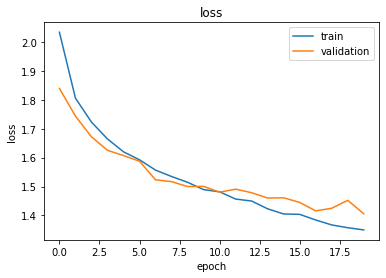

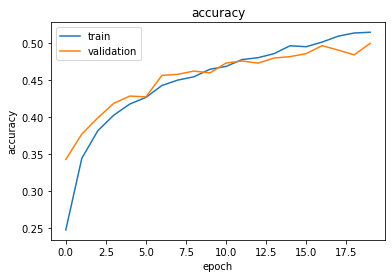

10000/10000 [==============================] - 0s 39us/sample - loss: 1.3983 - accuracy: 0.5023
[loss, accuracy] = [1.3982984470367432, 0.5023]


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

from modules.plot_history import plot_history
plot_history(hist, 'loss')
plot_history(hist, 'accuracy')

evaluation = model.evaluate( test_x, test_y, batch_size=64)
print( '[loss, accuracy] =', evaluation )

검증데이터로 모델에 입력을 넣어 어떠한 출력이 나오는지 확인해봅시다.

y_pred (10000, 10) float32
y_pred[0] [0.06899159 0.01641739 0.03147554 0.35516226 0.19293053 0.18995424
 0.02638797 0.0106626  0.10210007 0.00591792]
class_pred (10000,) int64
class_pred[0] 3


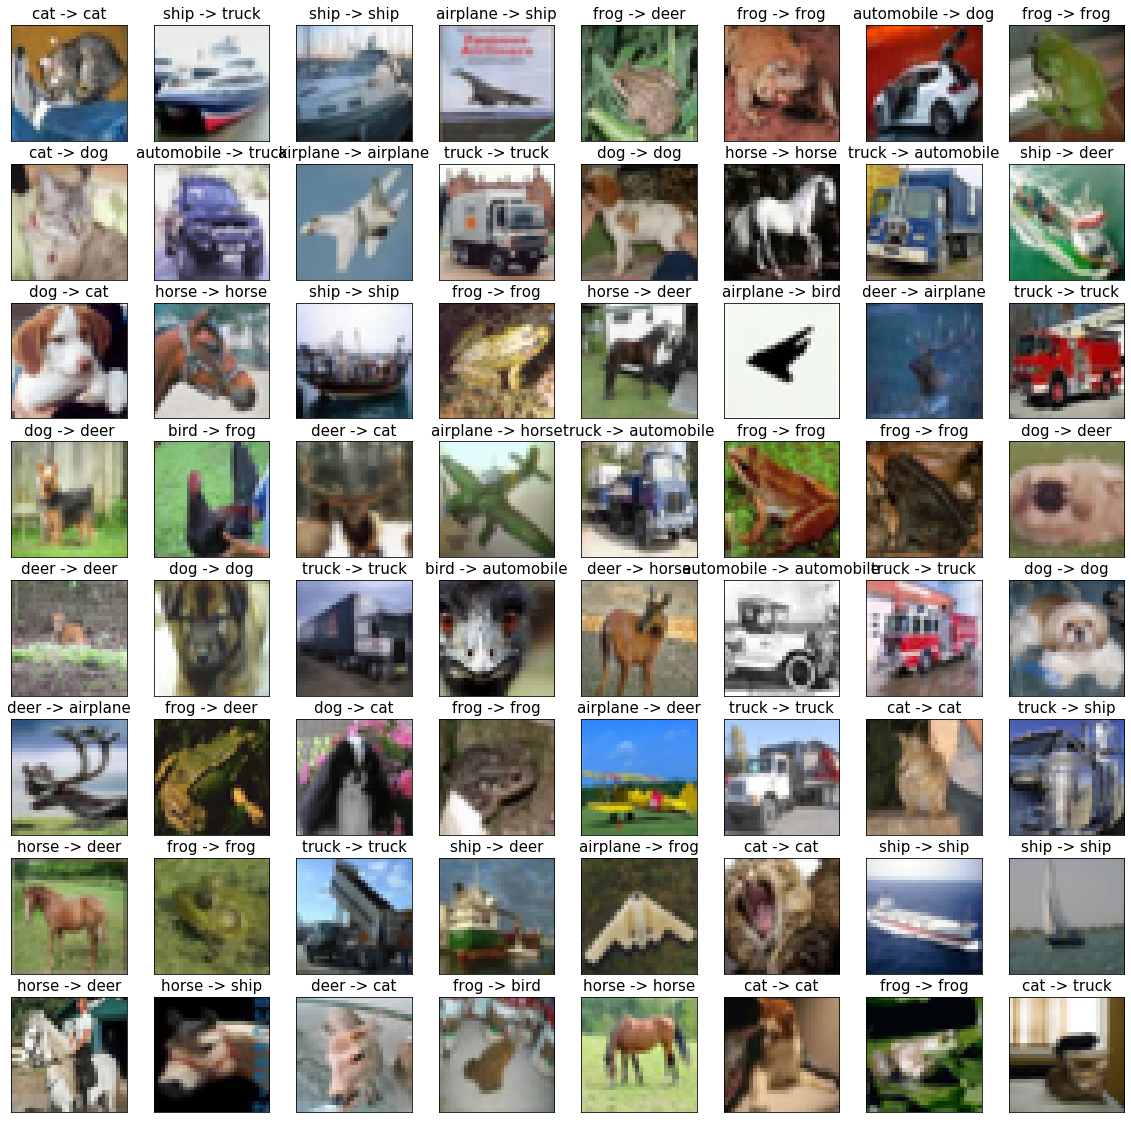

In [6]:
y_pred = model.predict(test_x)
print('y_pred', y_pred.shape, y_pred.dtype)
print('y_pred[0]', y_pred[0])

#class_pred = model.predict_classes( test_x ) # only for sequential model
class_pred = np.argmax(y_pred, axis=1)
print('class_pred', class_pred.shape, class_pred.dtype)
print('class_pred[0]', class_pred[0])

plt.figure( figsize=(20,20) )
for i in range(0,8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[test_labels[i][0]] + ' -> '  +
              class_names[class_pred[i]], {'fontsize':15} )
    plt.imshow( test_images[i] )